In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from typing import List

import warnings
warnings.filterwarnings(action='ignore')

# Part 1: Classification with Single Model

# Performance Evaluation Function

In [6]:
def perf_eval(cm: np.array):
    # True positive rate: TPR (recall)
    tpr = cm[1,1]/np.sum(cm[1])
    # Precision
    pre = cm[1,1]/np.sum(cm[1])
    # True negative rate: TNR
    tnr = cm[0,0]/np.sum(cm[0])
    # Simple Accuracy
    acc = (cm[0,0]+cm[1,1])/np.sum(cm)
    # Balanced Correction Rate
    bcr = np.sqrt(tpr*tnr)
    # F1-Measure
    f1 = 2*tpr*pre/(tpr+pre)
    
    return tpr, pre, tnr, acc, bcr, f1

In [7]:
perf_table = pd.DataFrame(
    data    = np.zeros(shape=(6,6)),
    index   = ["ANN", "CART", "Bagging ANN", "AdaBoost", "GBM", "Random Forests"],
    columns = ["TPR", "Precision", "TNR", "Accuracy", "BCR", "F1-Measure"]
)

In [8]:
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.0,0.0,0.0,0.0,0.0,0.0
CART,0.0,0.0,0.0,0.0,0.0,0.0
Bagging ANN,0.0,0.0,0.0,0.0,0.0,0.0
AdaBoost,0.0,0.0,0.0,0.0,0.0,0.0
GBM,0.0,0.0,0.0,0.0,0.0,0.0
Random Forests,0.0,0.0,0.0,0.0,0.0,0.0


## Model 1: Artificial Neural Network

In [9]:
# Load the data & Preprocessing
ploan = pd.read_csv('Personal Loan.csv')
input_idx = [1,2,3,5,6,7,8,10,11,12,13]
target_idx = 9

scaler = StandardScaler()
ploan_input = scaler.fit_transform(ploan.iloc[:,input_idx])
ploan_target = ploan.iloc[:,target_idx]

# Divide the dataset into the training dataset and test dataset
trn_idx = range(1500)
tst_idx = range(1500,2500)

# Input/target configuration
trn_input = ploan_input[trn_idx,:]
trn_target = ploan_target[trn_idx]

tst_input = ploan_input[tst_idx,:]
tst_target = ploan_target[tst_idx]

In [10]:
# Training ANN
ann_model = MLPClassifier(hidden_layer_sizes=14, max_iter=300, random_state=42).fit(X=trn_input, y=trn_target)

In [11]:
# Performance evaluation
ann_prey = ann_model.predict(X=tst_input)
ann_cfm = confusion_matrix(y_true=tst_target, y_pred=ann_prey)

In [12]:
perf_table.iloc[0,:] = perf_eval(cm=ann_cfm)
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.798077,0.798077,0.993304,0.973,0.890355,0.798077
CART,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Bagging ANN,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


## Model 2: Classification Tree

In [13]:
# Training the tree

cart_model = DecisionTreeClassifier(
    min_samples_split=10, max_depth=None, random_state=42
).fit(X=trn_input, y=trn_target)

In [14]:
# Prediction
cart_prey = cart_model.predict(X=tst_input)
cart_cfm = confusion_matrix(y_true=tst_target, y_pred=cart_prey)

In [15]:
perf_table.iloc[1,:] = perf_eval(cm=cart_cfm)
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.798077,0.798077,0.993304,0.973,0.890355,0.798077
CART,0.894231,0.894231,0.987723,0.978,0.939815,0.894231
Bagging ANN,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
AdaBoost,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


# Part 2: Classification with Ensemble Models

## Model 3: Bagging with Neural Network

In [16]:
# Baggin Training
bagging_ann_model = BaggingClassifier(
    base_estimator = MLPClassifier(hidden_layer_sizes=14, max_iter=300, random_state=42),
    n_estimators   = 100,
    n_jobs         = 8, # Assign the number of cores to be processed in parallel
    bootstrap      = True,
    verbose        = 1 #학습 과정을 지켜볼지
).fit(X=trn_input, y=trn_target)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   24.9s remaining:  1.3min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   27.2s finished


In [17]:
# Bagging Test
bagging_ann_prey = bagging_ann_model.predict(X=tst_input)
bagging_ann_cfm = confusion_matrix(y_true=tst_target, y_pred=bagging_ann_prey)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


In [18]:
perf_table.iloc[2,:] = perf_eval(cm=bagging_ann_cfm)
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.798077,0.798077,0.993304,0.973,0.890355,0.798077
CART,0.894231,0.894231,0.987723,0.978,0.939815,0.894231
Bagging ANN,0.778846,0.778846,0.994420,0.972,0.880057,0.778846
AdaBoost,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
GBM,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


성능이 단일모델보다 bad 애초에 ANN 성능이 낮아서 이를 base로 사용하는게 의미가 X라고 해석할 수 있음.

## Model 4: AdaBoost with Stump Tree

In [19]:
# Training AdaBoost with Stump Tree (Tree with 1 depth)
adaboost_model = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=1), # Stump Tree
    n_estimators   = 100,
    random_state   = 42
).fit(X=trn_input, y=trn_target)

In [20]:
# Prediction
adaboost_prey = adaboost_model.predict(X=tst_input)
adaboost_cfm = confusion_matrix(y_true=tst_target, y_pred=adaboost_prey)

In [21]:
perf_table.iloc[3,:] = perf_eval(cm=adaboost_cfm)
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.798077,0.798077,0.993304,0.973,0.890355,0.798077
CART,0.894231,0.894231,0.987723,0.978,0.939815,0.894231
Bagging ANN,0.778846,0.778846,0.994420,0.972,0.880057,0.778846
AdaBoost,0.692308,0.692308,0.976562,0.947,0.822242,0.692308
GBM,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
Random Forests,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


## Model 5: Gradient Boosting Machine

In [22]:
# Training GBM
gbm_model = GradientBoostingClassifier(
    n_estimators   = 1000, # Number of trees
    learning_rate  = 0.02, # Shrinkage
    subsample      = 0.8, # 80% of the training data is used for training
    random_state   = 42 
).fit(X=trn_input, y=trn_target)

In [23]:
# Variable Importance 
var_imp = gbm_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = ploan.iloc[:,input_idx].columns
).sort_values('variables importance', ascending=False)
var_imp_df

,variables importance
Income,0.369927
Education,0.362374
Family,0.127892
CCAvg,0.085386
Age,0.022852
CD Account,0.018302
Experience,0.007565
Mortgage,0.002769
Securities Account,0.001402
Online,0.001301


<Axes: xlabel='variables importance'>

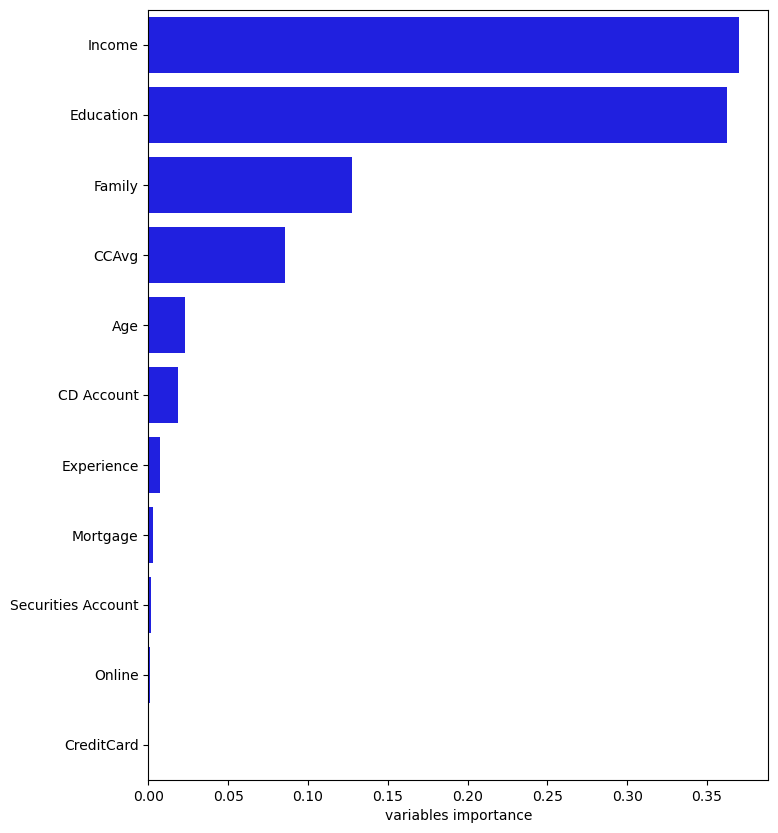

In [24]:
plt.figure(figsize=(8,10))
sns.barplot(
    x     = 'variables importance',
    y     = var_imp_df.index,
    color = 'blue',
    data  = var_imp_df
)

In [25]:
# Prediction
gbm_prey = gbm_model.predict(X=tst_input)
gbm_cfm = confusion_matrix(y_true=tst_target, y_pred=gbm_prey)

In [26]:
perf_table.iloc[4,:] = perf_eval(cm=gbm_cfm)
perf_table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.798077,0.798077,0.993304,0.973,0.890355,0.798077
CART,0.894231,0.894231,0.987723,0.978,0.939815,0.894231
Bagging ANN,0.778846,0.778846,0.994420,0.972,0.880057,0.778846
AdaBoost,0.692308,0.692308,0.976562,0.947,0.822242,0.692308
GBM,0.894231,0.894231,0.989955,0.980,0.940876,0.894231
Random Forests,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


## Model 6: Random Forest

In [27]:
# Training the Random Forest
rf_model = RandomForestClassifier(
    n_estimators = 100,
    verbose      = 1,
    random_state = 42
).fit(X=trn_input, y=trn_target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [28]:
# Variable Importance 
var_imp = rf_model.feature_importances_

var_imp_df = pd.DataFrame(
    data = var_imp,
    columns = ['variables importance'],
    index = ploan.iloc[:,input_idx].columns
).sort_values('variables importance', ascending=False)
var_imp_df

,variables importance
Income,0.326597
Education,0.192020
CCAvg,0.184544
Family,0.093745
CD Account,0.052799
Age,0.045023
Experience,0.041599
Mortgage,0.039293
Online,0.010764
CreditCard,0.007647


<Axes: ylabel='variables importance'>

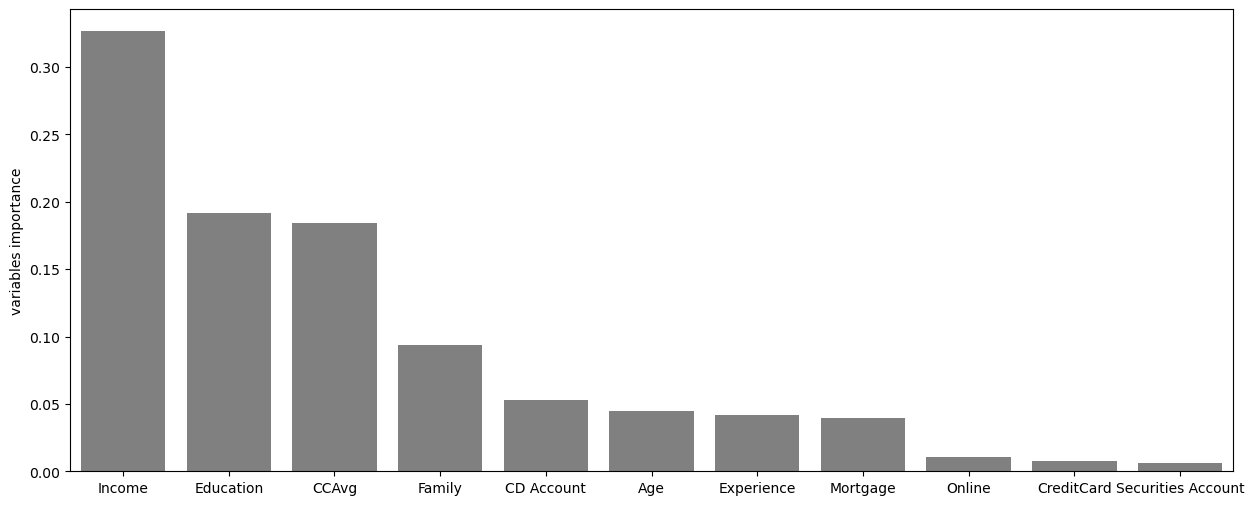

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(
    x     = var_imp_df.index,
    y     = 'variables importance',
    color = 'grey',
    data  = var_imp_df
)

In [30]:
# Prediction
rf_prey = rf_model.predict(X=tst_input)
rf_cfm = confusion_matrix(y_true=tst_target, y_pred=rf_prey)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [31]:
perf_table.iloc[5,:] = perf_eval(cm=rf_cfm)
perf_table.round(4)

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
ANN,0.7981,0.7981,0.9933,0.973,0.8904,0.7981
CART,0.8942,0.8942,0.9877,0.978,0.9398,0.8942
Bagging ANN,0.7788,0.7788,0.9944,0.972,0.8801,0.7788
AdaBoost,0.6923,0.6923,0.9766,0.947,0.8222,0.6923
GBM,0.8942,0.8942,0.9900,0.980,0.9409,0.8942
Random Forests,0.8365,0.8365,0.9955,0.979,0.9126,0.8365
